In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.test_strategy import (
    TestStrategy,
)
from vnpy.app.cta_strategy.strategies.double_ma_strategy import DoubleMaStrategy
from datetime import datetime

In [4]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="BTCUSDT.OKEX",
    interval="1m",
    start=datetime(2019, 8, 1),
    end=datetime(2019, 9, 30),
    rate=0.0015,
    slippage=0.05,
    size=1,
    pricetick=0.05,
    capital=200_000,
)
engine.add_strategy(DoubleMaStrategy, {})

2019-10-05 14:35:59.626247	开始加载历史数据
2019-10-05 14:35:59.627247	加载进度：##### [50%]
2019-10-05 14:35:59.628246	加载进度：########## [100%]
2019-10-05 14:35:59.628246	历史数据加载完成，数据量：86148
2019-10-05 14:35:59.668799	策略初始化完成
2019-10-05 14:35:59.668799	开始回放历史数据
2019-10-05 14:36:01.590285	历史数据回放结束
2019-10-05 14:36:01.590285	开始计算逐日盯市盈亏
2019-10-05 14:36:01.600321	逐日盯市盈亏计算完成
2019-10-05 14:36:01.600321	开始计算策略统计指标
2019-10-05 14:36:01.609285	------------------------------
2019-10-05 14:36:01.609285	首个交易日：	2019-08-03
2019-10-05 14:36:01.610287	最后交易日：	2019-09-30
2019-10-05 14:36:01.610287	总交易日：	59
2019-10-05 14:36:01.610287	盈利交易日：	2
2019-10-05 14:36:01.611288	亏损交易日：	57
2019-10-05 14:36:01.611288	起始资金：	200,000.00
2019-10-05 14:36:01.611288	结束资金：	-129,890.90
2019-10-05 14:36:01.611288	总收益率：	-164.95%
2019-10-05 14:36:01.612284	年化收益：	-670.96%
2019-10-05 14:36:01.612284	最大回撤: 	-323,440.95
2019-10-05 14:36:01.612284	百分比最大回撤: -167.20%
2019-10-05 14:36:01.613287	总盈亏：	-329,890.90
2019-10-05 14:36:01.613287	总手续费：	352,0

d:\work\vnpy\vnpy\app\cta_strategy\backtesting.py:373: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


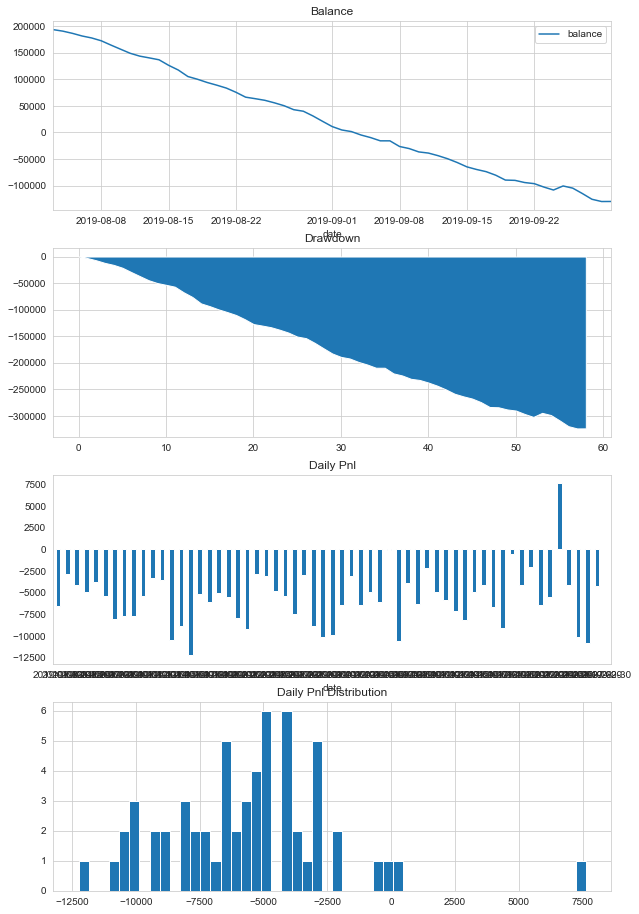

In [5]:
#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [8]:
setting = OptimizationSetting()
# setting.set_target("sharpe_ratio")
setting.set_target("end_balance")
setting.add_parameter("fast_window", 3, 60, 1)
setting.add_parameter("slow_window", 10, 120, 1)

engine.run_ga_optimization(setting, 10, 100)

2019-10-05 14:46:10.615205	参数优化空间：6438
2019-10-05 14:46:10.615205	每代族群总数：10
2019-10-05 14:46:10.615205	优良筛选个数：8
2019-10-05 14:46:10.615205	迭代次数：100
2019-10-05 14:46:10.615205	交叉概率：95%
2019-10-05 14:46:10.615205	突变概率：5%
2019-10-05 14:46:10.615205	开始加载历史数据
2019-10-05 14:46:10.616206	加载进度：##### [50%]
2019-10-05 14:46:10.617207	加载进度：########## [100%]
2019-10-05 14:46:10.617207	历史数据加载完成，数据量：86148
2019-10-05 14:46:10.659200	策略初始化完成
2019-10-05 14:46:10.660201	开始回放历史数据
2019-10-05 14:46:12.417334	历史数据回放结束
2019-10-05 14:46:12.418335	开始计算逐日盯市盈亏
2019-10-05 14:46:12.425335	逐日盯市盈亏计算完成
2019-10-05 14:46:12.425335	开始计算策略统计指标
2019-10-05 14:46:12.433336	开始加载历史数据
2019-10-05 14:46:12.434335	加载进度：##### [50%]
2019-10-05 14:46:12.435333	加载进度：########## [100%]
2019-10-05 14:46:12.435333	历史数据加载完成，数据量：86148
2019-10-05 14:46:12.470299	策略初始化完成
2019-10-05 14:46:12.470299	开始回放历史数据


d:\work\vnpy\vnpy\app\cta_strategy\backtesting.py:373: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


2019-10-05 14:46:13.951334	历史数据回放结束
2019-10-05 14:46:13.952336	开始计算逐日盯市盈亏
2019-10-05 14:46:13.952336	成交记录为空，无法计算
2019-10-05 14:46:13.952336	开始计算策略统计指标
2019-10-05 14:46:13.952336	开始加载历史数据
2019-10-05 14:46:13.952336	加载进度：##### [50%]
2019-10-05 14:46:13.953335	加载进度：########## [100%]
2019-10-05 14:46:13.953335	历史数据加载完成，数据量：86148
2019-10-05 14:46:13.992336	策略初始化完成
2019-10-05 14:46:13.992336	开始回放历史数据
2019-10-05 14:46:15.661436	历史数据回放结束
2019-10-05 14:46:15.661436	开始计算逐日盯市盈亏
2019-10-05 14:46:15.666404	逐日盯市盈亏计算完成
2019-10-05 14:46:15.666404	开始计算策略统计指标
2019-10-05 14:46:15.673439	开始加载历史数据
2019-10-05 14:46:15.674435	加载进度：##### [50%]
2019-10-05 14:46:15.675435	加载进度：########## [100%]
2019-10-05 14:46:15.675435	历史数据加载完成，数据量：86148
2019-10-05 14:46:15.715435	策略初始化完成
2019-10-05 14:46:15.715435	开始回放历史数据
2019-10-05 14:46:17.455991	历史数据回放结束
2019-10-05 14:46:17.455991	开始计算逐日盯市盈亏
2019-10-05 14:46:17.463987	逐日盯市盈亏计算完成
2019-10-05 14:46:17.463987	开始计算策略统计指标
2019-10-05 14:46:17.470988	开始加载历史数据
2019-10-05 14:46:17

2019-10-05 14:46:53.426398	历史数据回放结束
2019-10-05 14:46:53.426398	开始计算逐日盯市盈亏
2019-10-05 14:46:53.431393	逐日盯市盈亏计算完成
2019-10-05 14:46:53.431393	开始计算策略统计指标
2019-10-05 14:46:53.439396	开始加载历史数据
2019-10-05 14:46:53.440396	加载进度：##### [50%]
2019-10-05 14:46:53.441395	加载进度：########## [100%]
2019-10-05 14:46:53.441395	历史数据加载完成，数据量：86148
2019-10-05 14:46:53.487365	策略初始化完成
2019-10-05 14:46:53.487365	开始回放历史数据
2019-10-05 14:46:54.975400	历史数据回放结束
2019-10-05 14:46:54.975400	开始计算逐日盯市盈亏
2019-10-05 14:46:54.975400	成交记录为空，无法计算
2019-10-05 14:46:54.975400	开始计算策略统计指标
2019-10-05 14:46:54.975400	开始加载历史数据
2019-10-05 14:46:54.975400	加载进度：##### [50%]
2019-10-05 14:46:54.976399	加载进度：########## [100%]
2019-10-05 14:46:54.976399	历史数据加载完成，数据量：86148
2019-10-05 14:46:55.015363	策略初始化完成
2019-10-05 14:46:55.015363	开始回放历史数据
2019-10-05 14:46:56.662952	历史数据回放结束
2019-10-05 14:46:56.662952	开始计算逐日盯市盈亏
2019-10-05 14:46:56.667951	逐日盯市盈亏计算完成
2019-10-05 14:46:56.667951	开始计算策略统计指标
2  	10    	[28980.91487312] 	[19946.23524731]	[0.]     

2019-10-05 14:47:21.748449	历史数据回放结束
2019-10-05 14:47:21.749434	开始计算逐日盯市盈亏
2019-10-05 14:47:21.758434	逐日盯市盈亏计算完成
2019-10-05 14:47:21.759434	开始计算策略统计指标
28 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
29 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
30 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
31 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
2019-10-05 14:47:21.774433	开始加载历史数据
2019-10-05 14:47:21.775436	加载进度：##### [50%]
2019-10-05 14:47:21.776435	加载进度：########## [100%]
2019-10-05 14:47:21.776435	历史数据加载完成，数据量：86148
2019-10-05 14:47:21.815464	策略初始化完成
2019-10-05 14:47:21.815464	开始回放历史数据
2019-10-05 14:47:23.883468	历史数据回放结束
2019-10-05 14:47:23.883468	开始计算逐日盯市盈亏
2019-10-05 14:47:23.899468	逐日盯市盈亏计算完成
2019-10-05 14:47:23.899468	开始计算策略统计指标
2019-10-05 14:47:23.907467	开始加载历史数据
2019-10-05 14:47:23.908468	加载进度：##### [50%]
2019-10-05 14:47:23.909470	加载进度：########## [100%]
2019-10

2019-10-05 14:47:47.337318	历史数据回放结束
2019-10-05 14:47:47.338320	开始计算逐日盯市盈亏
2019-10-05 14:47:47.346352	逐日盯市盈亏计算完成
2019-10-05 14:47:47.346352	开始计算策略统计指标
62 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
63 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
64 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
2019-10-05 14:47:47.358351	开始加载历史数据
2019-10-05 14:47:47.359352	加载进度：##### [50%]
2019-10-05 14:47:47.360320	加载进度：########## [100%]
2019-10-05 14:47:47.360320	历史数据加载完成，数据量：86148
2019-10-05 14:47:47.397317	策略初始化完成
2019-10-05 14:47:47.398317	开始回放历史数据
2019-10-05 14:47:49.282356	历史数据回放结束
2019-10-05 14:47:49.282356	开始计算逐日盯市盈亏
2019-10-05 14:47:49.294352	逐日盯市盈亏计算完成
2019-10-05 14:47:49.294352	开始计算策略统计指标
2019-10-05 14:47:49.301351	开始加载历史数据
2019-10-05 14:47:49.302352	加载进度：##### [50%]
2019-10-05 14:47:49.303353	加载进度：########## [100%]
2019-10-05 14:47:49.303353	历史数据加载完成，数据量：86148
2019-10-05 14:47:49.342351	策略初始化完成
2019-

2019-10-05 14:48:17.832221	历史数据回放结束
2019-10-05 14:48:17.832221	开始计算逐日盯市盈亏
2019-10-05 14:48:17.841190	逐日盯市盈亏计算完成
2019-10-05 14:48:17.841190	开始计算策略统计指标
93 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
94 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
95 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
96 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
97 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
98 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
99 	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
100	10    	[57462.215777]   	[0.]            	[57462.215777]   	[57462.215777]
2019-10-05 14:48:17.859221	遗传算法优化完成，耗时127秒


[({'fast_window': 55, 'slow_window': 94}, 57462.215776999976, {})]